### <b> Solving Integrals and (Coupled) First Order Differential Equations </b>

<b> TODO: P2.1.1, P2.1.2, P2.1.3, P2.1.4</b>

#### <b> Integrals </b>

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

<b> 2.1.1 </b>

In [2]:
# Variables
a = -2
b = 1
n = [10, 100, 1000]

# Function
def f(x): 
    return (1 + x**2) / (1 + np.exp(x))

# Integral of f
x = np.linspace(a, b, n[2]) # evenly spaced points, change index of n between 0 and 2
y = f(x)

simpson_integral = sp.integrate.simpson(y, x)

/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_2067/3925389489.py:14: DeprecationWarning: You are passing x=[-2.         -1.996997   -1.99399399 -1.99099099 -1.98798799 -1.98498498
 -1.98198198 -1.97897898 -1.97597598 -1.97297297 -1.96996997 -1.96696697
 -1.96396396 -1.96096096 -1.95795796 -1.95495495 -1.95195195 -1.94894895
 -1.94594595 -1.94294294 -1.93993994 -1.93693694 -1.93393393 -1.93093093
 -1.92792793 -1.92492492 -1.92192192 -1.91891892 -1.91591592 -1.91291291
 -1.90990991 -1.90690691 -1.9039039  -1.9009009  -1.8978979  -1.89489489
 -1.89189189 -1.88888889 -1.88588589 -1.88288288 -1.87987988 -1.87687688
 -1.87387387 -1.87087087 -1.86786787 -1.86486486 -1.86186186 -1.85885886
 -1.85585586 -1.85285285 -1.84984985 -1.84684685 -1.84384384 -1.84084084
 -1.83783784 -1.83483483 -1.83183183 -1.82882883 -1.82582583 -1.82282282
 -1.81981982 -1.81681682 -1.81381381 -1.81081081 -1.80780781 -1.8048048
 -1.8018018  -1.7987988  -1.7957958  -1.79279279 -1.78978979 -1.78678679
 -1.7

In [3]:
print(f"Integral of f(x) in the interval [{a}, {b}] with {n[2]} points: {simpson_integral}")

Integral of f(x) in the interval [-2, 1] with 1000 points: 4.0826729930693215


#### <b> First Order Differential Equations </b>

In [4]:
def dvdt(t,v):
    return 3*v**2 - 5
v0 = 0 # initial condition

##### <b> Solvers </b>

* <b>odeint</b>: Pretty classic, uses a solver called Isoda FORTRAN library odepack

* <b>solve_ivp</b>: More customizable, can choose from a list of possible solvers

In [5]:
t = np.linspace(0, 1, 100)

In [6]:
t

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [7]:
sol_m1 = odeint(dvdt, y0=v0, t=t, tfirst=True)
sol_m2 = solve_ivp(dvdt, t_span=(0,max(t)), y0=[v0], t_eval=t)

In [8]:
#v_sol_m1
v_sol_m1 = sol_m1.T[0]

In [9]:
v_sol_m2 = sol_m2.y[0]

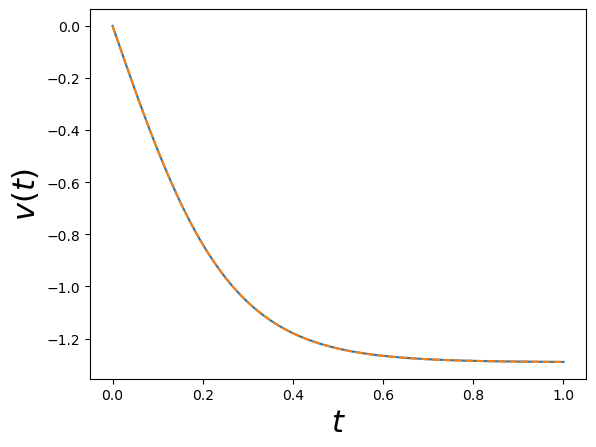

In [10]:
plt.plot(t, v_sol_m1)
plt.plot(t, v_sol_m2, '--')
plt.ylabel('$v(t)$', fontsize=22)
plt.xlabel('$t$', fontsize=22)
plt.show()

As we can see, since the graphs overlap at all points <b> t </b> both solvers (odeint and solve_ivp) return the same results. 

#### <b> Coupled First Order Differential Equations </b>

* $y1' = y1 + y2^2 + 3x$ 
    * $y1(0) = 0$

* $y2' = 3*y1 + y2^3 - cos(x)$
    * $y2(0) = 0$

* To solve both derivatives, since they rely on one another, we need to create a system $ S $ that takes in $ y1 $ and $ y2 $ as input

* Then, in order to find both $y1'$ and $y2'$ we need to find the derivative of $ S $ with respect to $ x $ -> <b> $dS/dx = f(x, S) = f(x, y1', y2') =  ( y1 + y2^2 + 3x, 3*y1 + y2^3 - cos(x))$ </b>



In [5]:
def dSdx(x, S):
    y1, y2 = S
    return [y1 + y2**2 + 3*x,
            3*y1 + y2**3 - np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

Solve the ODE

In [6]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=x, tfirst=True)

Get $ y1 $ and $ y2 $ from the solutions:

In [7]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

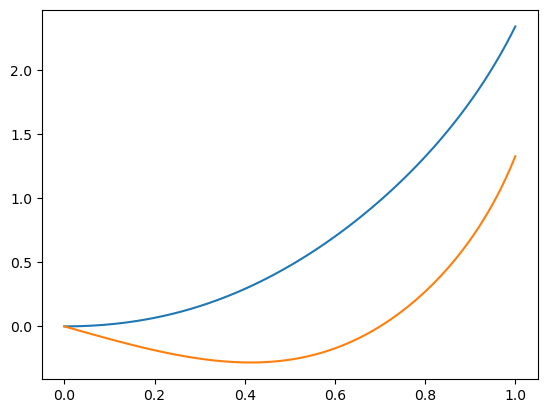

In [8]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

<b> 2.1.2 </b>

In [9]:
def dydx(x,y):
    return 1 - x*y

y_0 = 1
x = np.linspace(-2, 5, 100)

In [10]:
x

array([-2.        , -1.92929293, -1.85858586, -1.78787879, -1.71717172,
       -1.64646465, -1.57575758, -1.50505051, -1.43434343, -1.36363636,
       -1.29292929, -1.22222222, -1.15151515, -1.08080808, -1.01010101,
       -0.93939394, -0.86868687, -0.7979798 , -0.72727273, -0.65656566,
       -0.58585859, -0.51515152, -0.44444444, -0.37373737, -0.3030303 ,
       -0.23232323, -0.16161616, -0.09090909, -0.02020202,  0.05050505,
        0.12121212,  0.19191919,  0.26262626,  0.33333333,  0.4040404 ,
        0.47474747,  0.54545455,  0.61616162,  0.68686869,  0.75757576,
        0.82828283,  0.8989899 ,  0.96969697,  1.04040404,  1.11111111,
        1.18181818,  1.25252525,  1.32323232,  1.39393939,  1.46464646,
        1.53535354,  1.60606061,  1.67676768,  1.74747475,  1.81818182,
        1.88888889,  1.95959596,  2.03030303,  2.1010101 ,  2.17171717,
        2.24242424,  2.31313131,  2.38383838,  2.45454545,  2.52525253,
        2.5959596 ,  2.66666667,  2.73737374,  2.80808081,  2.87

In [11]:
sol = odeint(dydx, y0=y_0, t=x, tfirst=True)

In [12]:
sol.T[0]

array([ 1.        ,  1.22484786,  1.47599162,  1.7545146 ,  2.06121473,
        2.39654791,  2.76057374,  3.15290408,  3.57265738,  4.01842052,
        4.48822042,  4.97950718,  5.48915067,  6.01345188,  6.54817002,
        7.08856614,  7.62946286,  8.16531995,  8.69032439,  9.19849313,
        9.68378618, 10.14022705, 10.56202731, 10.94371175, 11.28023992,
       11.5671209 , 11.80051708, 11.97733383, 12.095292  , 12.15298081,
       12.1498894 , 12.0864161 , 11.96385497, 11.78436035, 11.55089056,
       11.26713286, 10.9374122 , 10.56658698, 10.15993491,  9.72303341,
        9.26163733,  8.78155837,  8.28854958,  7.78819729,  7.28582438,
        6.78640573,  6.29449829,  5.81418643,  5.34904271,  4.9021045 ,
        4.47586505,  4.07227864,  3.69277757,  3.33830015,  3.00932686,
        2.70592387,  2.42779016,  2.17430871,  1.94459797,  1.73756287,
        1.55194418,  1.38636491,  1.23937243,  1.10947663,  0.99518302,
        0.89502065,  0.80756527,  0.73145762,  0.66541703,  0.60

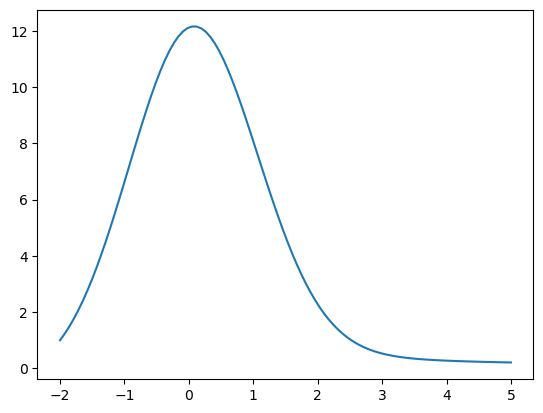

In [13]:
plt.plot(x, sol.T[0])

<b> 2.1.3 </b>

In [29]:
# Function
def f2(x, c): 
    return (1 + c*x**2) / (1 + np.exp(c*x))

# Integral of f2
def I(c):
    x = np.linspace(-2, 2, 1000)
    y = f2(x,c)
    simpson_integral = sp.integrate.simpson(y, x)

    return simpson_integral

In [34]:
# Descobrir o zero da função I(c)

from scipy.optimize import root
def root_I():

    sol = root(I, 0)

    if sol.success:
        return sol.x[0]
    else:
        raise ValueError("There's no root for function I")


In [35]:
root = root_I()

/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_5487/1439938563.py:9: DeprecationWarning: You are passing x=[-2.         -1.995996   -1.99199199 -1.98798799 -1.98398398 -1.97997998
 -1.97597598 -1.97197197 -1.96796797 -1.96396396 -1.95995996 -1.95595596
 -1.95195195 -1.94794795 -1.94394394 -1.93993994 -1.93593594 -1.93193193
 -1.92792793 -1.92392392 -1.91991992 -1.91591592 -1.91191191 -1.90790791
 -1.9039039  -1.8998999  -1.8958959  -1.89189189 -1.88788789 -1.88388388
 -1.87987988 -1.87587588 -1.87187187 -1.86786787 -1.86386386 -1.85985986
 -1.85585586 -1.85185185 -1.84784785 -1.84384384 -1.83983984 -1.83583584
 -1.83183183 -1.82782783 -1.82382382 -1.81981982 -1.81581582 -1.81181181
 -1.80780781 -1.8038038  -1.7997998  -1.7957958  -1.79179179 -1.78778779
 -1.78378378 -1.77977978 -1.77577578 -1.77177177 -1.76776777 -1.76376376
 -1.75975976 -1.75575576 -1.75175175 -1.74774775 -1.74374374 -1.73973974
 -1.73573574 -1.73173173 -1.72772773 -1.72372372 -1.71971972 -1.71571572
 -1.7

In [36]:
print(f"The root of the function I(c) is: {root}")

The root of the function I(c) is: -0.7499999999998457


<b> 2.1.4 </b>

In [37]:
def dSdx(x, S):
    y1, y2 = S # S is a tuple
    return [x**2 - y1*y2,
            1 + y1+y2/x+3]
# Range
x = np.linspace(-2, 2, 1000)

#Initial conditions
y1_0 = 0
y2_0 = 0
S_O = (y1_0, y2_0)

In [39]:
dSdx_sol = odeint(dSdx, y0 = S_0, t=x, tfirst=True)

In [42]:
y1_Sol = dSdx_sol.T[0]
y2_Sol = dSdx_sol.T[1]

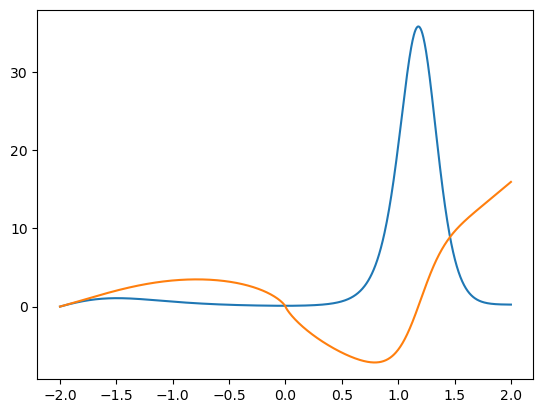

In [43]:
plt.plot(x, y1_Sol)
plt.plot(x, y2_Sol)
plt.show()
